<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo_104/blob/main/Reto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **Reto - Entrega 1:**
###**Limpieza, análisis, visualización y kmeans**


<img src="https://static.wikia.nocookie.net/tecdemonterrey/images/1/1b/Logo_Tec_azul.png/revision/latest?cb=20190219041656&path-prefix=es" width="230" />

Maestría en Inteligencia Artificial Aplicada

**Datos generales**
---
EQUIPO 104

**Integrantes:**
* Eddie Guadalupe Elorza Ruiz | **A01793547**
* Yves Turley Macias Vargas. | **A00813752**


>Materia: Ciencia y analítica de datos (Gpo 10)

>Profesor Titular: PhD. María de la Paz Rico Fdz

>Profesor Tutor: Victoria Guerrero Orozco

16 de noviembre 2022

-----



##**Limpieza, análisis, visualización y kmeans**
En esta base de datos encontraras:

*   Aguas subterraneas.
*   Aguas superficiales.

Elige una base de datos, ya sea la de aguas superficiales o la de aguas subterraneas.

*   Limpieza de base de datos.
*   Explorar  cada datos (auxiliate de describe(), mean(), plot, boxplot de pandas):

    Identificando tendencias centrales promedio, media y mediana de los datos. 
    Identificar medidas de dispersión, máximo, mínimo .
    Identificar medidas de posición no centrales, los cuartiles, outliers.   
    Identificar correlaciones.
    Preparar los datos 
*   Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.
*   Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.

Las aguas superficiales son aquellas que se mantienen sobre la tierra y en contacto con la atmósfera, es decir, en la superficie. Para identificarlas fácilmente podemos decir que son aquellas que podemos ver a simple vista o que no están bajo tierra.

Estos cuerpos de agua recogen el agua de las lluvias, nacimientos de agua y de los escurrimientos que provienen de otras fuentes de agua. El destino final de las aguas superficiales que tienen salida es un cuerpo de agua más grande, como por ejemplo ocurre con los ríos que llegan hasta el océano.

In [8]:
#Instalamos libreria para trabajar con mapas
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
!pip install patool


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# PARTE 1

In [10]:
import patoolib as pt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns   
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import PowerTransformer
from IPython.utils import io
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, make_scorer
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score 
from scipy.stats import alpha
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import pydotplus 
from IPython.display import Image
import os
from sklearn.preprocessing import StandardScaler
import geopandas as gpd
from shapely.geometry import Point
from sklearn.cluster import KMeans
import folium


In [11]:
#mandamos hablarle a nuestro dataset
df = pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/actividades-de-aprendizaje-YvTur/main/proyecto/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020%20-%20Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv') # Mandando a llamar la base de datos que utilizaremos definiendo el ";" como separador de datos
df.head()


,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
0,DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,...,"DQO,CF,",SI,NO,SI,NO,SI,ND,SI,SI,LENTICO
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO


In [12]:
df.isnull().any()


CLAVE                     False
SITIO                     False
ORGANISMO_DE_CUENCA       False
ESTADO                    False
MUNICIPIO                 False
CUENCA                     True
CUERPO DE AGUA             True
TIPO                      False
SUBTIPO                    True
LONGITUD                  False
LATITUD                   False
PERIODO                   False
DBO_mg/L                   True
CALIDAD_DBO                True
DQO_mg/L                   True
CALIDAD_DQO                True
SST_mg/L                   True
CALIDAD_SST                True
COLI_FEC_NMP_100mL         True
CALIDAD_COLI_FEC           True
E_COLI_NMP_100mL           True
CALIDAD_E_COLI             True
ENTEROC_NMP_100mL          True
CALIDAD_ENTEROC            True
OD_PORC                    True
CALIDAD_OD_PORC            True
OD_PORC_SUP                True
CALIDAD_OD_PORC_SUP        True
OD_PORC_MED                True
CALIDAD_OD_PORC_MED        True
OD_PORC_FON                True
CALIDAD_

In [13]:
df.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'CUENCA', 'CUERPO DE AGUA', 'TIPO', 'SUBTIPO', 'LONGITUD', 'LATITUD',
       'PERIODO', 'DBO_mg/L', 'CALIDAD_DBO', 'DQO_mg/L', 'CALIDAD_DQO',
       'SST_mg/L', 'CALIDAD_SST', 'COLI_FEC_NMP_100mL', 'CALIDAD_COLI_FEC',
       'E_COLI_NMP_100mL', 'CALIDAD_E_COLI', 'ENTEROC_NMP_100mL',
       'CALIDAD_ENTEROC', 'OD_PORC', 'CALIDAD_OD_PORC', 'OD_PORC_SUP',
       'CALIDAD_OD_PORC_SUP', 'OD_PORC_MED', 'CALIDAD_OD_PORC_MED',
       'OD_PORC_FON', 'CALIDAD_OD_PORC_FON', 'TOX_D_48_UT', 'CALIDAD_TOX_D_48',
       'TOX_V_15_UT', 'CALIDAD_TOX_V_15', 'TOX_D_48_SUP_UT',
       'CALIDAD TOX_D_48_SUP', 'TOX_D_48_FON_UT', 'CALIDAD_TOX_D_48_FON',
       'TOX_FIS_SUP_15_UT', 'CALIDAD_TOX_FIS_SUP_15', 'TOX_FIS_FON_15_UT',
       'CALIDAD_TOX_FIS_FON_15', 'SEMAFORO', 'CONTAMINANTES', 'CUMPLE_CON_DBO',
       'CUMPLE_CON_DQO', 'CUMPLE_CON_SST', 'CUMPLE_CON_CF',
       'CUMPLE_CON_E_COLI', 'CUMPLE_CON_ENTEROC', 'CUMPLE_CON_OD',
  

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLAVE                   3493 non-null   object 
 1   SITIO                   3493 non-null   object 
 2   ORGANISMO_DE_CUENCA     3493 non-null   object 
 3   ESTADO                  3493 non-null   object 
 4   MUNICIPIO               3493 non-null   object 
 5   CUENCA                  3492 non-null   object 
 6   CUERPO DE AGUA          3479 non-null   object 
 7   TIPO                    3493 non-null   object 
 8   SUBTIPO                 3479 non-null   object 
 9   LONGITUD                3493 non-null   float64
 10  LATITUD                 3493 non-null   float64
 11  PERIODO                 3493 non-null   int64  
 12  DBO_mg/L                2581 non-null   object 
 13  CALIDAD_DBO             2581 non-null   object 
 14  DQO_mg/L                2581 non-null   

In [15]:
df = df.dropna(how='all')

In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3493 entries, 0 to 3492
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLAVE                   3493 non-null   object 
 1   SITIO                   3493 non-null   object 
 2   ORGANISMO_DE_CUENCA     3493 non-null   object 
 3   ESTADO                  3493 non-null   object 
 4   MUNICIPIO               3493 non-null   object 
 5   CUENCA                  3492 non-null   object 
 6   CUERPO DE AGUA          3479 non-null   object 
 7   TIPO                    3493 non-null   object 
 8   SUBTIPO                 3479 non-null   object 
 9   LONGITUD                3493 non-null   float64
 10  LATITUD                 3493 non-null   float64
 11  PERIODO                 3493 non-null   int64  
 12  DBO_mg/L                2581 non-null   object 
 13  CALIDAD_DBO             2581 non-null   object 
 14  DQO_mg/L                2581 non-null   

In [17]:
df.columns


Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'CUENCA', 'CUERPO DE AGUA', 'TIPO', 'SUBTIPO', 'LONGITUD', 'LATITUD',
       'PERIODO', 'DBO_mg/L', 'CALIDAD_DBO', 'DQO_mg/L', 'CALIDAD_DQO',
       'SST_mg/L', 'CALIDAD_SST', 'COLI_FEC_NMP_100mL', 'CALIDAD_COLI_FEC',
       'E_COLI_NMP_100mL', 'CALIDAD_E_COLI', 'ENTEROC_NMP_100mL',
       'CALIDAD_ENTEROC', 'OD_PORC', 'CALIDAD_OD_PORC', 'OD_PORC_SUP',
       'CALIDAD_OD_PORC_SUP', 'OD_PORC_MED', 'CALIDAD_OD_PORC_MED',
       'OD_PORC_FON', 'CALIDAD_OD_PORC_FON', 'TOX_D_48_UT', 'CALIDAD_TOX_D_48',
       'TOX_V_15_UT', 'CALIDAD_TOX_V_15', 'TOX_D_48_SUP_UT',
       'CALIDAD TOX_D_48_SUP', 'TOX_D_48_FON_UT', 'CALIDAD_TOX_D_48_FON',
       'TOX_FIS_SUP_15_UT', 'CALIDAD_TOX_FIS_SUP_15', 'TOX_FIS_FON_15_UT',
       'CALIDAD_TOX_FIS_FON_15', 'SEMAFORO', 'CONTAMINANTES', 'CUMPLE_CON_DBO',
       'CUMPLE_CON_DQO', 'CUMPLE_CON_SST', 'CUMPLE_CON_CF',
       'CUMPLE_CON_E_COLI', 'CUMPLE_CON_ENTEROC', 'CUMPLE_CON_OD',
  

In [18]:
numericos = df.dtypes[df.dtypes != "object"].drop(['LONGITUD', 'LATITUD', 'PERIODO']).index
numericos

Index(['TOX_D_48_FON_UT', 'CALIDAD_TOX_D_48_FON', 'TOX_FIS_FON_15_UT',
       'CALIDAD_TOX_FIS_FON_15'],
      dtype='object')

In [19]:
df[numericos].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3493 entries, 0 to 3492
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TOX_D_48_FON_UT         0 non-null      float64
 1   CALIDAD_TOX_D_48_FON    0 non-null      float64
 2   TOX_FIS_FON_15_UT       0 non-null      float64
 3   CALIDAD_TOX_FIS_FON_15  0 non-null      float64
dtypes: float64(4)
memory usage: 136.4 KB


In [20]:
df.drop(columns=numericos, inplace=True)

In [21]:
df.dropna(axis=0, inplace=True, subset=['LONGITUD', 'LATITUD'])

In [22]:
df[['LONGITUD', 'LATITUD']].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3493 entries, 0 to 3492
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LONGITUD  3493 non-null   float64
 1   LATITUD   3493 non-null   float64
dtypes: float64(2)
memory usage: 81.9 KB


In [23]:
categoricas = df.dtypes[df.dtypes == "object"].index
categoricas

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'CUENCA', 'CUERPO DE AGUA', 'TIPO', 'SUBTIPO', 'DBO_mg/L',
       'CALIDAD_DBO', 'DQO_mg/L', 'CALIDAD_DQO', 'SST_mg/L', 'CALIDAD_SST',
       'COLI_FEC_NMP_100mL', 'CALIDAD_COLI_FEC', 'E_COLI_NMP_100mL',
       'CALIDAD_E_COLI', 'ENTEROC_NMP_100mL', 'CALIDAD_ENTEROC', 'OD_PORC',
       'CALIDAD_OD_PORC', 'OD_PORC_SUP', 'CALIDAD_OD_PORC_SUP', 'OD_PORC_MED',
       'CALIDAD_OD_PORC_MED', 'OD_PORC_FON', 'CALIDAD_OD_PORC_FON',
       'TOX_D_48_UT', 'CALIDAD_TOX_D_48', 'TOX_V_15_UT', 'CALIDAD_TOX_V_15',
       'TOX_D_48_SUP_UT', 'CALIDAD TOX_D_48_SUP', 'TOX_FIS_SUP_15_UT',
       'CALIDAD_TOX_FIS_SUP_15', 'SEMAFORO', 'CONTAMINANTES', 'CUMPLE_CON_DBO',
       'CUMPLE_CON_DQO', 'CUMPLE_CON_SST', 'CUMPLE_CON_CF',
       'CUMPLE_CON_E_COLI', 'CUMPLE_CON_ENTEROC', 'CUMPLE_CON_OD',
       'CUMPLE_CON_TOX', 'GRUPO'],
      dtype='object')

In [24]:
df.isna().any()

CLAVE                     False
SITIO                     False
ORGANISMO_DE_CUENCA       False
ESTADO                    False
MUNICIPIO                 False
CUENCA                     True
CUERPO DE AGUA             True
TIPO                      False
SUBTIPO                    True
LONGITUD                  False
LATITUD                   False
PERIODO                   False
DBO_mg/L                   True
CALIDAD_DBO                True
DQO_mg/L                   True
CALIDAD_DQO                True
SST_mg/L                   True
CALIDAD_SST                True
COLI_FEC_NMP_100mL         True
CALIDAD_COLI_FEC           True
E_COLI_NMP_100mL           True
CALIDAD_E_COLI             True
ENTEROC_NMP_100mL          True
CALIDAD_ENTEROC            True
OD_PORC                    True
CALIDAD_OD_PORC            True
OD_PORC_SUP                True
CALIDAD_OD_PORC_SUP        True
OD_PORC_MED                True
CALIDAD_OD_PORC_MED        True
OD_PORC_FON                True
CALIDAD_

In [25]:
df[['SEMAFORO', 'CONTAMINANTES']]


,SEMAFORO,CONTAMINANTES
0,Rojo,"DQO,CF,"
1,Verde,NaN
2,Verde,NaN
3,Verde,NaN
4,Verde,NaN
...,...,...
3488,Amarillo,"CF,E_COLI,"
3489,Rojo,"DBO,DQO,CF,"
3490,Rojo,"DQO,"
3491,Amarillo,"CF,"


In [26]:
df[['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
    'CUENCA', 'CUERPO DE AGUA', 'TIPO', 'SUBTIPO', 'GRUPO','PERIODO' ]].isna().value_counts()

CLAVE  SITIO  ORGANISMO_DE_CUENCA  ESTADO  MUNICIPIO  CUENCA  CUERPO DE AGUA  TIPO   SUBTIPO  GRUPO  PERIODO
False  False  False                False   False      False   False           False  False    False  False      3478
                                                              True            False  True     False  False        14
                                                      True    False           False  False    False  False         1
dtype: int64

In [27]:
df['CUENCA'].fillna(value='RIO ACAPILCAN', inplace=True)
df[['CUENCA']].isna().any()

CUENCA    False
dtype: bool

In [28]:
df[['CUENCA']].isna().value_counts()

CUENCA
False     3493
dtype: int64

In [29]:
df[categoricas].dtypes

CLAVE                     object
SITIO                     object
ORGANISMO_DE_CUENCA       object
ESTADO                    object
MUNICIPIO                 object
CUENCA                    object
CUERPO DE AGUA            object
TIPO                      object
SUBTIPO                   object
DBO_mg/L                  object
CALIDAD_DBO               object
DQO_mg/L                  object
CALIDAD_DQO               object
SST_mg/L                  object
CALIDAD_SST               object
COLI_FEC_NMP_100mL        object
CALIDAD_COLI_FEC          object
E_COLI_NMP_100mL          object
CALIDAD_E_COLI            object
ENTEROC_NMP_100mL         object
CALIDAD_ENTEROC           object
OD_PORC                   object
CALIDAD_OD_PORC           object
OD_PORC_SUP               object
CALIDAD_OD_PORC_SUP       object
OD_PORC_MED               object
CALIDAD_OD_PORC_MED       object
OD_PORC_FON               object
CALIDAD_OD_PORC_FON       object
TOX_D_48_UT               object
CALIDAD_TO

In [30]:
variables_numericas = ['DQO_mg/L','SST_mg/L',
       'COLI_FEC_NMP_100mL', 'E_COLI_NMP_100mL',
       'ENTEROC_NMP_100mL', 'OD_PORC',
       'OD_PORC_SUP', 'OD_PORC_MED',
        'OD_PORC_FON','TOX_D_48_UT', 'TOX_V_15_UT',
       'TOX_D_48_SUP_UT', 'TOX_FIS_SUP_15_UT']

In [31]:
df.replace(to_replace={'<1': 0.5, '<2': 1,'<3': 1.5,'<10': 5}, inplace=True)
df[variables_numericas]

,DQO_mg/L,SST_mg/L,COLI_FEC_NMP_100mL,E_COLI_NMP_100mL,ENTEROC_NMP_100mL,OD_PORC,OD_PORC_SUP,OD_PORC_MED,OD_PORC_FON,TOX_D_48_UT,TOX_V_15_UT,TOX_D_48_SUP_UT,TOX_FIS_SUP_15_UT
0,54.08,13.75,1162,98,NaN,NaN,46.8,NaN,NaN,NaN,NaN,0.5,0.5
1,NaN,5,NaN,NaN,20,NaN,92,95.4,92.2,NaN,NaN,NaN,0.5
2,NaN,5,NaN,NaN,1.5,NaN,92,95.4,92.2,NaN,NaN,NaN,0.5
3,NaN,13.9667,NaN,NaN,1.5,NaN,NaN,NaN,86.7,NaN,NaN,NaN,0.5
4,NaN,5,NaN,NaN,30,NaN,96.2,95.9,95.5,NaN,NaN,NaN,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3488,5,122,2400,2400,NaN,69.1,NaN,NaN,NaN,0.5,0.5,NaN,NaN
3489,115.88,54,2400,4,NaN,NaN,91.6,NaN,NaN,NaN,NaN,0.5,0.5
3490,87.64,70,240,15,NaN,78.8,NaN,NaN,NaN,0.5,0.5,NaN,NaN
3491,35.92,56,2400,11,NaN,76.2,NaN,NaN,NaN,0.5,0.5,NaN,NaN


In [32]:
categoricas = ['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
    'CUENCA', 'TIPO', 'GRUPO','PERIODO' ]

In [33]:
#Definimos X
X = df.drop(columns='SEMAFORO',axis=1)

#Definimos Y

y = df['SEMAFORO']

In [34]:
# Transformamos el tipo de datos en X a float

X[variables_numericas]= X[variables_numericas].astype(float)

In [35]:
X[variables_numericas].dtypes


DQO_mg/L              float64
SST_mg/L              float64
COLI_FEC_NMP_100mL    float64
E_COLI_NMP_100mL      float64
ENTEROC_NMP_100mL     float64
OD_PORC               float64
OD_PORC_SUP           float64
OD_PORC_MED           float64
OD_PORC_FON           float64
TOX_D_48_UT           float64
TOX_V_15_UT           float64
TOX_D_48_SUP_UT       float64
TOX_FIS_SUP_15_UT     float64
dtype: object

In [36]:

imputador = SimpleImputer(strategy='median', missing_values = np.nan)
imputador = imputador.fit(X[variables_numericas])
X[variables_numericas] = imputador.transform(X[variables_numericas])

In [37]:
X[variables_numericas].describe()


,DQO_mg/L,SST_mg/L,COLI_FEC_NMP_100mL,E_COLI_NMP_100mL,ENTEROC_NMP_100mL,OD_PORC,OD_PORC_SUP,OD_PORC_MED,OD_PORC_FON,TOX_D_48_UT,TOX_V_15_UT,TOX_D_48_SUP_UT,TOX_FIS_SUP_15_UT
count,3493.000000,3493.000000,3.493000e+03,3.493000e+03,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000
mean,53.788020,100.799334,7.135836e+04,5.875626e+04,282.156656,67.391583,82.854881,72.267163,67.279072,0.544490,0.935532,0.515356,0.514363
std,130.112188,441.883028,1.005750e+06,9.045168e+05,2240.667815,22.958114,19.569612,9.972742,14.873979,0.509372,4.626526,0.422002,0.249498
min,5.000000,5.000000,1.500000e+00,1.500000e+00,1.500000,5.000000,5.000000,5.000000,5.000000,0.500000,0.500000,0.500000,0.500000
25%,16.740000,5.000000,8.550000e+02,9.000000e+01,1.500000,67.400000,84.100000,72.400000,67.500000,0.500000,0.500000,0.500000,0.500000
50%,27.010000,24.300000,2.400000e+03,4.240000e+02,1.500000,68.300000,84.100000,72.400000,67.500000,0.500000,0.500000,0.500000,0.500000
75%,42.620000,57.000000,1.100000e+04,2.400000e+03,1.500000,69.400000,84.100000,72.400000,67.500000,0.500000,0.500000,0.500000,0.500000
max,2871.250000,9430.000000,2.419600e+07,2.419600e+07,24196.000000,226.100000,289.000000,133.000000,146.000000,23.949000,156.250000,21.320000,7.870000


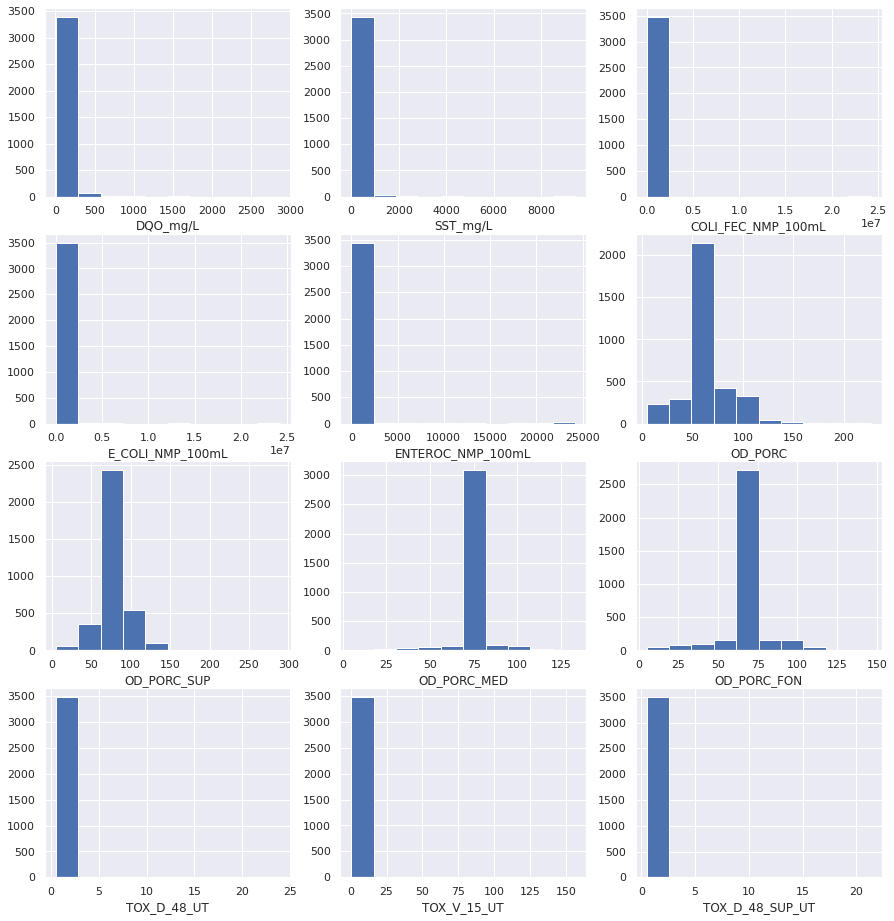

In [38]:
sns.set(rc={'figure.figsize':(15,16)})
fig, axes = plt.subplots(4, 3)   
for k in range(0,12):
  plt.subplot(4,3,k+1) 
  plt.hist(X[X[variables_numericas].columns[k]], bins=10)    
  plt.xlabel(X[variables_numericas].columns[k])
plt.show()

In [39]:
X[variables_numericas].isna().any()


DQO_mg/L              False
SST_mg/L              False
COLI_FEC_NMP_100mL    False
E_COLI_NMP_100mL      False
ENTEROC_NMP_100mL     False
OD_PORC               False
OD_PORC_SUP           False
OD_PORC_MED           False
OD_PORC_FON           False
TOX_D_48_UT           False
TOX_V_15_UT           False
TOX_D_48_SUP_UT       False
TOX_FIS_SUP_15_UT     False
dtype: bool

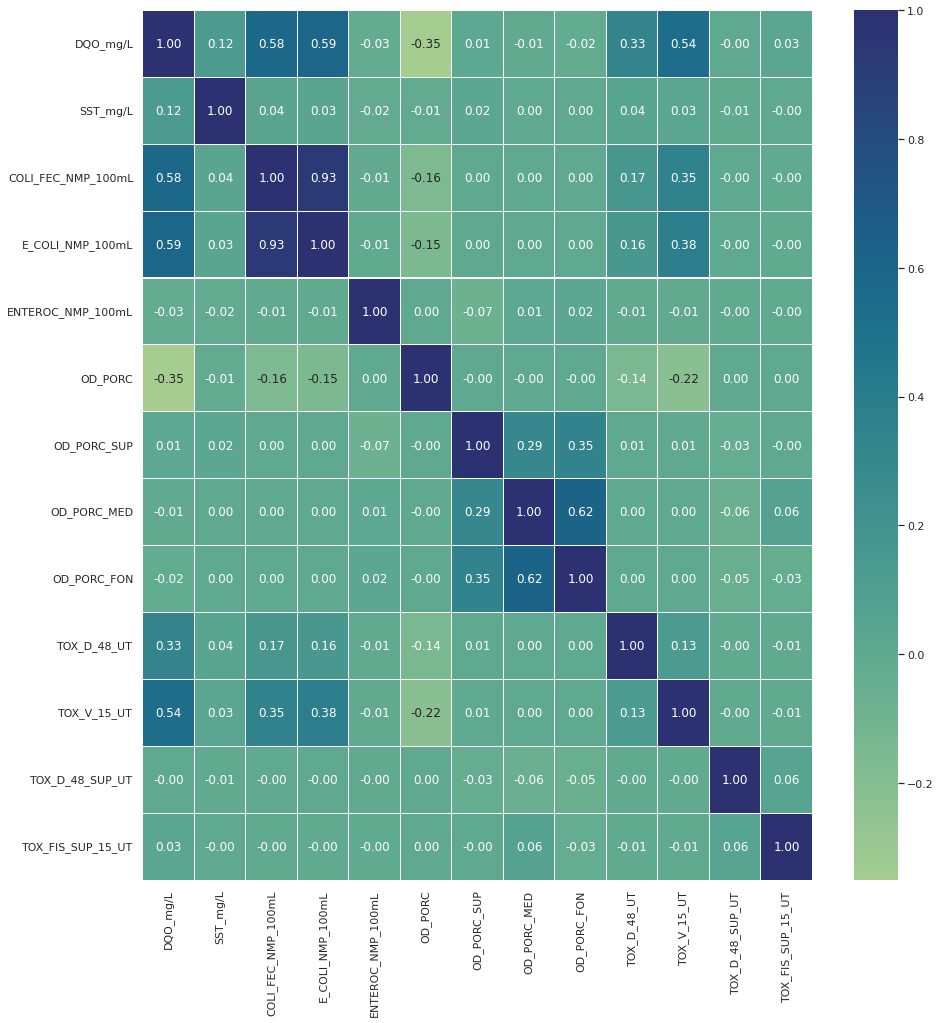

In [40]:
import seaborn
from seaborn import heatmap
matriz = X[variables_numericas].corr(method='pearson')

seaborn.heatmap(matriz, cmap="crest", annot=True, linewidths=0.1, linecolor='white', fmt=".2f")

In [41]:
#Identificamos los outliers

Q1 = X[variables_numericas].quantile(0.25)

Q3 = X[variables_numericas].quantile(0.75)

IQR = Q3-Q1

BM = (X[variables_numericas] > (Q3+1.5 *IQR)) | (X[variables_numericas] < (Q1-1.5 *IQR))

#Vemos los valores de los outliers
X[variables_numericas][BM]

,DQO_mg/L,SST_mg/L,COLI_FEC_NMP_100mL,E_COLI_NMP_100mL,ENTEROC_NMP_100mL,OD_PORC,OD_PORC_SUP,OD_PORC_MED,OD_PORC_FON,TOX_D_48_UT,TOX_V_15_UT,TOX_D_48_SUP_UT,TOX_FIS_SUP_15_UT
0,NaN,NaN,NaN,NaN,NaN,NaN,46.8,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,20.0,NaN,92.0,95.4,92.2,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,92.0,95.4,92.2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.7,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,30.0,NaN,96.2,95.9,95.5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3489,115.88,NaN,NaN,NaN,NaN,NaN,91.6,NaN,NaN,NaN,NaN,NaN,NaN
3490,87.64,NaN,NaN,NaN,NaN,78.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3491,NaN,NaN,NaN,NaN,NaN,76.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
for i in variables_numericas:

    Q3 = X[i].quantile(0.75)

    Q1 = X[i].quantile(0.25)

    IQR = Q3 - Q1

    lower_cap = Q1-IQR*1.5

    upper_cap = Q3+IQR*1.5

    BM = X[i] < lower_cap

    candidate_index = X[BM].index

    X.loc[candidate_index,i] = lower_cap

    BM = X[i] > upper_cap

    candidate_index = X[BM].index

    X.loc[candidate_index,i] = upper_cap

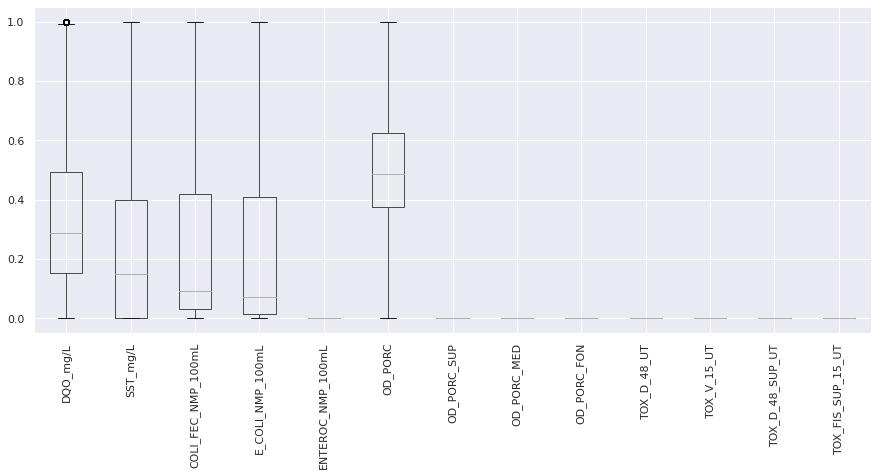

In [47]:
#Graficamos los resultados nuevamente

sns.set(rc={'figure.figsize':(15,6)})
X[variables_numericas].boxplot(rot=90)

In [48]:
# Escalamos los datos numéricos de 0 a 1

scaler = MinMaxScaler(feature_range=(0, 1))
X[variables_numericas] = scaler.fit_transform(X[variables_numericas])

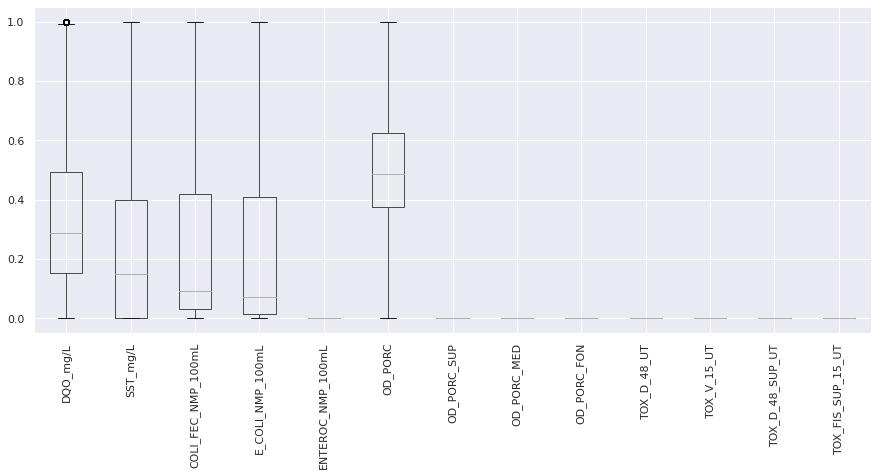

In [49]:
#Graficamos los resultados nuevamente después de normalizar los valores

sns.set(rc={'figure.figsize':(15,6)})
X[variables_numericas].boxplot(rot=90)

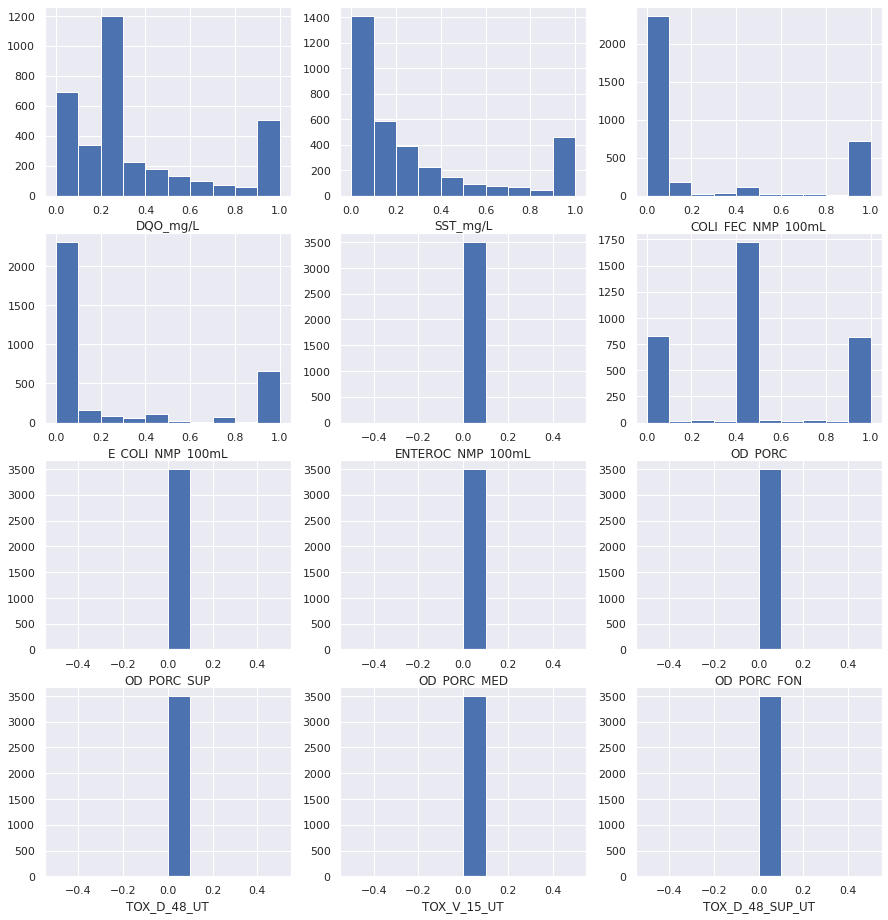

In [50]:
sns.set(rc={'figure.figsize':(15,16)})
fig, axes = plt.subplots(4, 3)    
for k in range(0,12):
  plt.subplot(4,3,k+1)   
  plt.hist(X[X[variables_numericas].columns[k]], bins=10) 
  plt.xlabel(X[variables_numericas].columns[k])
plt.show()

In [51]:
# Visualizamos en el mapa de las ubicaciones de las cuencas identificadas con el semáforo de contaminantes 

df_sup= df['SEMAFORO'].copy()
df_sup.replace("Verde", "green", inplace=True)
df_sup.replace("Rojo", "red", inplace=True)
df_sup.replace("Amarillo", "yellow", inplace=True)

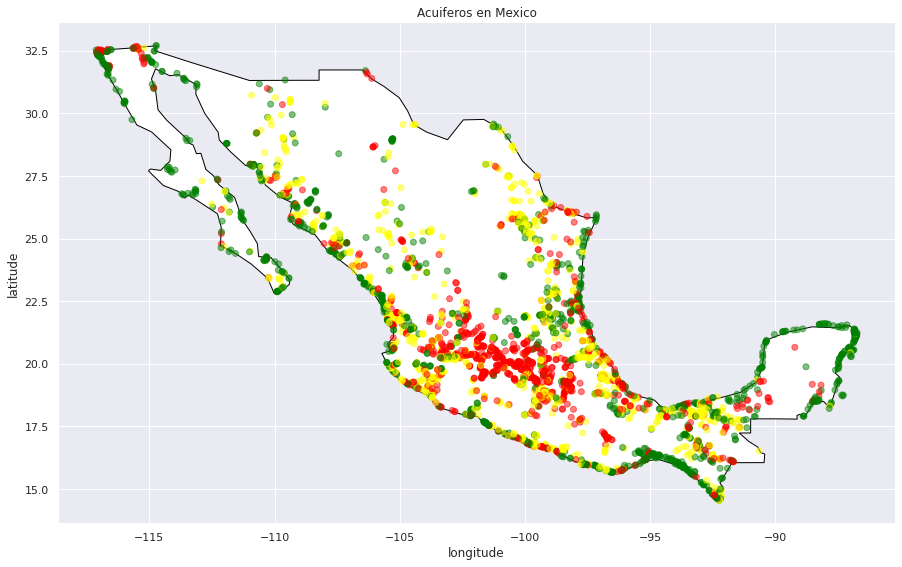

In [52]:
# Graficamos las ubicaciones con su color en la columna "SEMAFORO"

dot_map = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.LONGITUD, df.LATITUD))

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

world = world.set_index("iso_a3")
world.name.unique()

fig, gax = plt.subplots(figsize=(15,10))

world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')
dot_map.plot(ax=gax, color=df_sup, alpha = 0.5) 
 

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Acuiferos en Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [53]:
#Preparación para los Kmeans
kmeans = KMeans(n_clusters=7)
kmeans.fit(df[['LATITUD', 'LONGITUD']])

centers = kmeans.cluster_centers_
centers = pd.DataFrame(centers, columns=['LATITUD', 'LONGITUD'])
centers['Coordinates'] = list(zip(centers['LONGITUD'], centers['LATITUD']))
centers['Coordinates'] = centers['Coordinates'].apply(Point)

g_centers = gpd.GeoDataFrame(centers, geometry='Coordinates')

In [54]:
X = df[['LONGITUD', 'LATITUD']]

kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_ #sacar centroides
labels = kmeans.predict(X) #labels predecidos
# Getting the cluster centers
C = kmeans.cluster_centers_ #traigo valores de centroides

C_DF = pd.DataFrame(C) #convertirlo en DataFrame
C_DF["Coordinates"] = list(zip(C_DF[0], C_DF[1])) #lo convierte en lista 
C_DF["Coordinates"] = C_DF["Coordinates"].apply(Point) #lo convierte en puntos para gráficar

centroid = gpd.GeoDataFrame(C_DF, geometry="Coordinates")
centroid

,0,1,Coordinates
0,-110.648349,27.695136,POINT (-110.64835 27.69514)
1,-93.476237,17.896671,POINT (-93.47624 17.89667)
2,-101.053383,20.847797,POINT (-101.05338 20.84780)


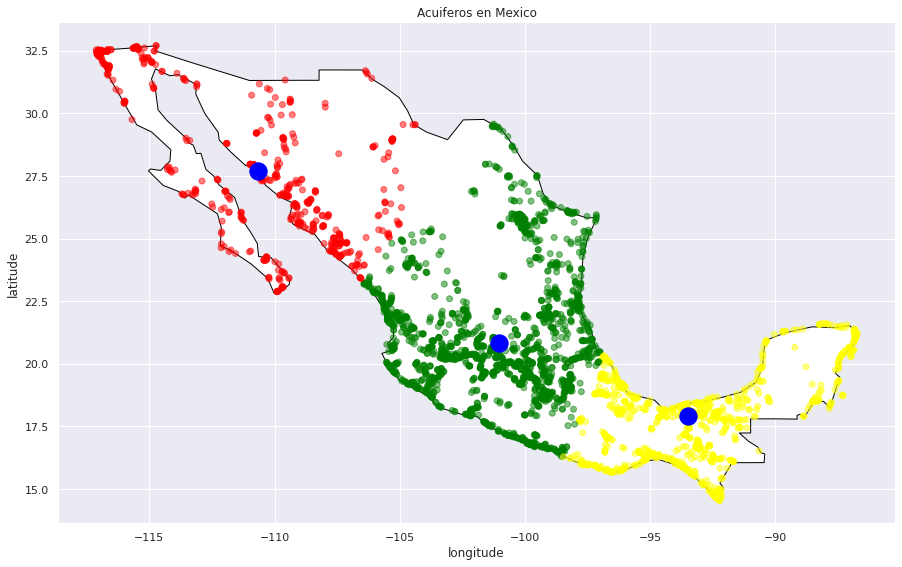

In [55]:
dot_map = gpd.GeoDataFrame(df.copy(), geometry=gpd.points_from_xy(df.LONGITUD, df.LATITUD))

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

world = world.set_index("iso_a3")
world.name.unique()

fig, gax = plt.subplots(figsize=(15,10))
colores = ['red','yellow','green']
color_asig = []

for row in labels:
  color_asig.append(colores[row])
world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')
dot_map.plot(ax=gax, color=color_asig, alpha = 0.5) 
centroid.plot(ax=gax, color='blue', alpha = 1, markersize = 300) 

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Acuiferos en Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

# ***CONCLUSIONES***
Para el análisis de los datos se utilizó el algoritmo de Kmeans para agrupar los datos en 3 grupos, los cuales se representan en el mapa de color rojo, amarillo y verde.
Con el análisis de los datos se puede observar que los acuíferos con mayor contaminación se encuentran en el estado de Veracruz, mientras que los acuíferos con menor contaminación se encuentran en el estado de Chiapas.
Los acuíferos con mayor contaminación se encuentran en la zona centro del país, mientras que los acuíferos con menor contaminación se encuentran en la zona sur del país.